In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow.keras.metrics import categorical_crossentropy


from tensorflow.keras.applications import imagenet_utils
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.applications import mobilenet_v2
from tensorflow.keras.layers import Dense
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow import keras
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np 
import os
import cv2
from tqdm import tqdm
from tensorflow.keras import optimizers

from keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications.mobilenet_v2 import preprocess_input

from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import math
import numpy as np
import pandas as pd

# import scikitplot
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, GlobalAvgPool2D, GlobalMaxPool2D
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.utils import plot_model

In [ ]:
import tensorflow as tf

print(tf.version.VERSION)

2.12.0


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/fer/fer2013.csv')
#check data shape
data.shape

(35887, 3)

In [ ]:
"""
    We read the fer2013.csv file using pandas. 
    The fer2013 is the facial expressions recognition csv file from Kaggle.
    in the csv file we have 3 main columns - emotion, pixels and Usage.
    The emotion column consists of labels 0-6,
    The pixels row contains the pixel images in an array format,
    The Usage column contains of Training, Public Test and Private Test.

"""

data = pd.read_csv("/content/drive/MyDrive/fer/fer2013.csv")
data.head()
print(data)



       emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

[35887 rows x 3 columns]


In [ ]:
# trainlabels = []
# trainimages = []
# testlabels=[]
# testimages=[]
# vallabels=[]
# valimages=[]

counttr0 = 0
counttr1 = 0
counttr2 = 0
counttr3 = 0
counttr4 = 0
counttr5 = 0
counttr6 = 0
min_num = 3170

countte0 = 0
countte1 = 0
countte2 = 0
countte3 = 0
countte4 = 0
countte5 = 0
countte6 = 0

countva0 = 0
countva1 = 0
countva2 = 0
countva3 = 0
countva4 = 0
countva5 = 0
countva6 = 0

OHL = []
names = []

for i, j, k in tqdm(zip(data["emotion"], data["pixels"], data["Usage"])):
    pixel = []
    pixels = j.split(' ')
    for m in pixels:
        value = float(m)
        pixel.append(value)
    pixel = np.array(pixel)
    image = pixel.reshape(48, 48)

    if k == "Training":
        if not os.path.exists("train"):
            os.mkdir("train")
        if i == 0 :
            if not os.path.exists("train/Angry"):
                os.mkdir("train/Angry")
                path = "train/Angry/"  + str(counttr0) + ".png"
                cv2.imwrite(path , image)
                counttr0 += 1
                OHL.append("1000000")
                names.append(counttr0)
                # trainlabels.append(i)
                # trainimages.append(j)
               
               
            else:
                path = "train/Angry/" + str(counttr0) + ".png"
                cv2.imwrite(path , image)
                counttr0 += 1
                OHL.append("1000000")
                names.append(counttr0)
                # trainlabels.append(i)
                # trainimages.append(j)

        if i == 1 :
           if not os.path.exists("train/Disgust"):
               os.mkdir("train/Disgust")
               path = "train/Disgust/" + str(counttr1) + ".png"
               cv2.imwrite(path , image)
               counttr1 += 1
               OHL.append("0100000")
               names.append(counttr1)
              #  trainlabels.append(i)
              #  trainimages.append(j)
              
              
           else:
               path = "train/Disgust/" + str(counttr1) + ".png"
               cv2.imwrite(path , image)
               counttr1 += 1
               OHL.append("0100000")
               names.append(counttr1)
              #  trainlabels.append(i)
              #  trainimages.append(j)
                

        elif i == 2 :
            if not os.path.exists("train/Fear"):
                os.mkdir("train/Fear")
                path = "train/Fear/" + str(counttr2) + ".png"
                cv2.imwrite(path , image)
                counttr2 += 1
                OHL.append("0010000")
                names.append(counttr2)

                # trainlabels.append(i)
                # trainimages.append(j)
               
            else:
                path = "train/Fear/" + str(counttr2) + ".png"
                cv2.imwrite(path , image)
                counttr2 += 1
                OHL.append("0010000")
                names.append(counttr2)
                # trainlabels.append(i)
                # trainimages.append(j)
                

               

        elif i == 3 :
            if not os.path.exists("train/Happy"):
                os.mkdir("train/Happy")
                path = "train/Happy/" + str(counttr3) + ".png"
                cv2.imwrite(path , image)
                counttr3 += 1
                OHL.append("0001000")
                names.append(counttr3)
                # trainlabels.append(i)
                # trainimages.append(j)
              
            else:
                path = "train/Happy/" + str(counttr3) + ".png"
                cv2.imwrite(path , image)
                counttr3 += 1
                OHL.append("0001000")
                names.append(counttr3)
                # trainlabels.append(i)
                # trainimages.append(j)
              
              
        elif i == 4:
            if not os.path.exists("train/Sad"):
                os.mkdir("train/Sad")
                path = "train/Sad/" + str(counttr4) + ".png"
                cv2.imwrite(path , image)
                counttr4 += 1
                OHL.append("0000100")
                names.append(counttr4)
                # trainlabels.append(i)
                # trainimages.append(j)
            else:
                path = "train/Sad/" + str(counttr4) + ".png"
                cv2.imwrite(path , image)
                counttr4 += 1
                OHL.append("0000100")
                names.append(counttr4)
                # trainlabels.append(i)
                # trainimages.append(j)
               
               
        elif i == 5 :
            if not os.path.exists("train/Suprise"):
                os.mkdir("train/Suprise")
                path = "train/Suprise/" + str(counttr5) + ".png"
                cv2.imwrite(path , image)
                counttr5 += 1
                OHL.append("0000010")
                names.append(counttr5)
                # trainlabels.append(i)
                # trainimages.append(j)
              
            else:
                path = "train/Suprise/" + str(counttr5) + ".png"
                cv2.imwrite(path , image)
                counttr5 += 1
                OHL.append("0000010")
                names.append(counttr5)
                # if count5 == min_num:
                #   break
                # trainlabels.append(i)
                # trainimages.append(j)
               
               

        elif i == 6 :
            if not os.path.exists("train/Neutral"):
                os.mkdir("train/Neutral")
                path = "train/Neutral/" + str(counttr6) + ".png"
                cv2.imwrite(path , image)
                counttr6 += 1
                OHL.append("0000001")
                names.append(counttr6)
                # trainlabels.append(i)
                # trainimages.append(j)
                
             
            else:
                path = "train/Neutral/" + str(counttr6) + ".png"
                cv2.imwrite(path , image)
                counttr6 += 1
                OHL.append("0000001")
                names.append(counttr6)
                # trainlabels.append(i)
                # trainimages.append(j)
               

            
                  
       

    elif k=="PrivateTest":
 
        if not os.path.exists("validation"):
            os.mkdir("validation")
        if i == 0:
            if not os.path.exists("validation/Angry"):
                os.mkdir("validation/Angry")
                path = "validation/Angry/" + str(countva0) + ".png"
                cv2.imwrite(path , image)
                countva0 += 1
                # vallabels.append(i)
                # valimages.append(j)
            else:
                path = "validation/Angry/" + str(countva0) + ".png"
                cv2.imwrite(path , image)
                countva0 += 1
                # vallabels.append(i)
                # valimages.append(j)


        if i == 1:
           if not os.path.exists("validation/Disgust"):
               os.mkdir("validation/Disgust")
               path = "validation/Disgust/" + str(countva1) + ".png"
               cv2.imwrite(path , image)
               countva1 += 1
              #  vallabels.append(i)
              #  valimages.append(j)
              
              
           else:
               path = "validation/Disgust/" + str(countva1) + ".png"
               cv2.imwrite(path , image)
               countva1 += 1
              #  vallabels.append(i)
              #  valimages.append(j)

        elif i == 2:
            if not os.path.exists("validation/Fear"):
                os.mkdir("validation/Fear")
                path = "validation/Fear/" + str(countva2) + ".png"
                cv2.imwrite(path , image)
                countva2 += 1
                # vallabels.append(i)
                # valimages.append(j)
            else:
                path = "validation/Fear/" + str(countva2) + ".png"
                cv2.imwrite(path , image)
                countva2 += 1
                # vallabels.append(i)
                # valimages.append(j)

        elif i == 3:
            if not os.path.exists("validation/Happy"):
                os.mkdir("validation/Happy")
                path = "validation/Happy/" + str(countva3) + ".png"
                cv2.imwrite(path , image)
                countva3 += 1
                # vallabels.append(i)
                # valimages.append(j)
            else:
                path = "validation/Happy/" + str(countva3) + ".png"
                cv2.imwrite(path , image)
                countva3 += 1
                # vallabels.append(i)
                # valimages.append(j)

        elif i == 4:
            if not os.path.exists("validation/Sad"):
                os.mkdir("validation/Sad")
                path = "validation/Sad/" + str(countva4) + ".png"
                cv2.imwrite(path , image)
                countva4 += 1
                # vallabels.append(i)
                # valimages.append(j)
            else:
                path = "validation/Sad/" + str(countva4) + ".png"
                cv2.imwrite(path , image)
                countva4 += 1
                # vallabels.append(i)
                # valimages.append(j)

        elif i == 5:
            if not os.path.exists("validation/Suprise"):
                os.mkdir("validation/Suprise")
                path = "validation/Suprise/" + str(countva5) + ".png"
                cv2.imwrite(path , image)
                countva5 += 1
                # vallabels.append(i)
                # valimages.append(j)
            else:
                path = "validation/Suprise/" + str(countva5) + ".png"
                cv2.imwrite(path , image)
                countva5 += 1
                # vallabels.append(i)
                # valimages.append(j)

        elif i == 6:
            if not os.path.exists("validation/Neutral"):
                os.mkdir("validation/Neutral")
                path = "validation/Neutral/" + str(countva6) + ".png"
                cv2.imwrite(path , image)
                countva6 += 1
                # vallabels.append(i)
                # valimages.append(j)
            else:
                path = "validation/Neutral/" + str(countva6) + ".png"
                cv2.imwrite(path , image)
                countva6 += 1
                # vallabels.append(i)
                # valimages.append(j)





    elif k=="PublicTest":

        if not os.path.exists("test"):
            os.mkdir("test")
        if i == 0:
            if not os.path.exists("test/Angry"):
                os.mkdir("test/Angry")
                path = "test/Angry/" + str(countte0) + ".png"
                cv2.imwrite(path , image)
                countte0 += 1
                # testlabels.append(i)
                # testimages.append(j)
            else:
                path = "test/Angry/" + str(countte0) + ".png"
                cv2.imwrite(path , image)
                countte0 += 1
                # testlabels.append(i)
                # testimages.append(j)



        if i == 1:
           if not os.path.exists("test/Disgust"):
               os.mkdir("test/Disgust")
               path = "test/Disgust/" + str(countte1) + ".png"
               cv2.imwrite(path , image)
               countte1 += 1
              #  testlabels.append(i)
              #  testimages.append(j)
              
              
           else:
               path = "test/Disgust/" + str(countte1) + ".png"
               cv2.imwrite(path , image)
               countte1 += 1
              #  testlabels.append(i)
              #  testimages.append(j)

        elif i == 2:
            if not os.path.exists("test/Fear"):
                os.mkdir("test/Fear")
                path = "test/Fear/" + str(countte2) + ".png"
                cv2.imwrite(path , image)
                countte2 += 1
                # testlabels.append(i)
                # testimages.append(j)
            else:
                path = "test/Fear/" + str(countte2) + ".png"
                cv2.imwrite(path , image)
                countte2 += 1
                # testlabels.append(i)
                # testimages.append(j)

        elif i == 3:
            if not os.path.exists("test/Happy"):
                os.mkdir("test/Happy")
                path = "test/Happy/" + str(countte3) + ".png"
                cv2.imwrite(path , image)
                countte3 += 1
                # testlabels.append(i)
                # testimages.append(j)
            else:
                path = "test/Happy/" + str(countte3) + ".png"
                cv2.imwrite(path , image)
                countte3 += 1
                # testlabels.append(i)
                # testimages.append(j)

        elif i == 4:
            if not os.path.exists("test/Sad"):
                os.mkdir("test/Sad")
                path = "test/Sad/" + str(countte4) + ".png"
                cv2.imwrite(path , image)
                countte4 += 1
                # testlabels.append(i)
                # testimages.append(j)
            else:
                path = "test/Sad/" + str(countte4) + ".png"
                cv2.imwrite(path , image)
                countte4 += 1
                # testlabels.append(i)
                # testimages.append(j)

        elif i == 5:
            if not os.path.exists("test/Suprise"):
                os.mkdir("test/Suprise")
                path = "test/Suprise/" + str(countte5) + ".png"
                cv2.imwrite(path , image)
                countte5 += 1
                # testlabels.append(i)
                # testimages.append(j)
            else:
                path = "test/Suprise/" + str(countte5) + ".png"
                cv2.imwrite(path , image)
                countte5 += 1
                # testlabels.append(i)
                # testimages.append(j)

        elif i == 6:
            if not os.path.exists("test/Neutral"):
                os.mkdir("test/Neutral")
                path = "test/Neutral/" + str(countte6) + ".png"
                cv2.imwrite(path , image)
                countte6 += 1
                # testlabels.append(i)
                # testimages.append(j)
            else:
                path = "test/Neutral/" + str(countte6) + ".png"
                cv2.imwrite(path , image)
                countte6 += 1
                # testlabels.append(i)
                # testimages.append(j)

    

35887it [00:47, 749.53it/s]


In [ ]:
INPUT_PATH = "/content/train/"
INPUT_PATH2 = "/content/test/"
INPUT_PATH3 = "/content/validation/"



In [ ]:
total_images1 = 0
for dir_ in os.listdir(INPUT_PATH):
    count = 0
    for f in os.listdir(INPUT_PATH + dir_ + "/"):
        count += 1
        total_images1 += 1
    print(f"{dir_} has {count} number of images")
    
print(f"\ntotal images1 are {total_images1}")

Angry has 3995 number of images
Fear has 4097 number of images
Disgust has 436 number of images
Happy has 7215 number of images
Sad has 4830 number of images
Suprise has 3171 number of images
Neutral has 4965 number of images

total images1 are 28709


In [ ]:
total_images2 = 0
for dir_ in os.listdir(INPUT_PATH2):
    count = 0
    for f in os.listdir(INPUT_PATH2 + dir_ + "/"):
        count += 1
        total_images2 += 1
    print(f"{dir_} has {count} number of images")
    
print(f"\ntotal images2 are {total_images2}")

Angry has 467 number of images
Fear has 496 number of images
Disgust has 56 number of images
Happy has 895 number of images
Sad has 653 number of images
Suprise has 415 number of images
Neutral has 607 number of images

total images2 are 3589


In [ ]:

total_images3 = 0
for dir_ in os.listdir(INPUT_PATH3):
    count = 0
    for f in os.listdir(INPUT_PATH3 + dir_ + "/"):
        count += 1
        total_images3 += 1
    print(f"{dir_} has {count} number of images")
    
print(f"\ntotal images3 are {total_images3}")

Angry has 491 number of images
Fear has 528 number of images
Disgust has 55 number of images
Happy has 879 number of images
Sad has 594 number of images
Suprise has 416 number of images
Neutral has 626 number of images

total images3 are 3589


In [ ]:
# TOP_EMOTIONS = ["Fear", "Happy", "Neutral", "Angry","Disgust","Sad","Suprise"]
# total_images=total_images3 + total_images1+total_images2
# total_images

In [ ]:
TOP_EMOTIONS = ["Fear", "Happy", "Neutral","Sad"]
total_images1 -= 3995 + 436 + 3171 
total_images2 -= 467 + 56 + 415 
total_images3 -= 491 + 55 +416

total_images=total_images3 + total_images1+total_images2
total_images

26385

In [ ]:
X_train = np.empty(shape=(total_images1,48,48,3))
y_train = np.empty(shape=(total_images1))
label_to_text = {}

i = 0
e = 0
for dir_ in os.listdir(INPUT_PATH):
    if dir_ in TOP_EMOTIONS:
        label_to_text[e] = dir_
        for f in os.listdir(INPUT_PATH + dir_ + "/"):
            X_train[i] = cv2.imread(INPUT_PATH + dir_ + "/" + f)
            y_train[i] = e
            i += 1
        print(f"loaded all {dir_} images to numpy arrays")
        e += 1

X_train.shape, y_train

loaded all Fear images to numpy arrays
loaded all Happy images to numpy arrays
loaded all Sad images to numpy arrays
loaded all Neutral images to numpy arrays


((21107, 48, 48, 3), array([0., 0., 0., ..., 3., 3., 3.]))

In [ ]:
X_valid = np.empty(shape=(total_images2,48,48,3))
y_valid = np.empty(shape=(total_images2))
label_to_text = {}

i = 0
e = 0
for dir_ in os.listdir(INPUT_PATH2):
    if dir_ in TOP_EMOTIONS:
        label_to_text[e] = dir_
        for f in os.listdir(INPUT_PATH2 + dir_ + "/"):
            X_valid[i] = cv2.imread(INPUT_PATH2 + dir_ + "/" + f)
            y_valid[i] = e
            i += 1
        print(f"loaded all {dir_} images to numpy arrays")
        e += 1

X_valid.shape, y_valid

loaded all Fear images to numpy arrays
loaded all Happy images to numpy arrays
loaded all Sad images to numpy arrays
loaded all Neutral images to numpy arrays


((2651, 48, 48, 3), array([0., 0., 0., ..., 3., 3., 3.]))

In [ ]:
X_test = np.empty(shape=(total_images3,48,48,3))
y_test = np.empty(shape=(total_images3))
label_to_text = {}

i = 0
e = 0
for dir_ in os.listdir(INPUT_PATH3):
    if dir_ in TOP_EMOTIONS:
        label_to_text[e] = dir_
        for f in os.listdir(INPUT_PATH3 + dir_ + "/"):
            X_test[i] = cv2.imread(INPUT_PATH3 + dir_ + "/" + f)
            y_test[i] = e
            i += 1
        print(f"loaded all {dir_} images to numpy arrays")
        e += 1

X_test.shape, y_test

loaded all Fear images to numpy arrays
loaded all Happy images to numpy arrays
loaded all Sad images to numpy arrays
loaded all Neutral images to numpy arrays


((2627, 48, 48, 3), array([0., 0., 0., ..., 3., 3., 3.]))

In [ ]:
label_to_text

{0: 'Fear', 1: 'Happy', 2: 'Sad', 3: 'Neutral'}

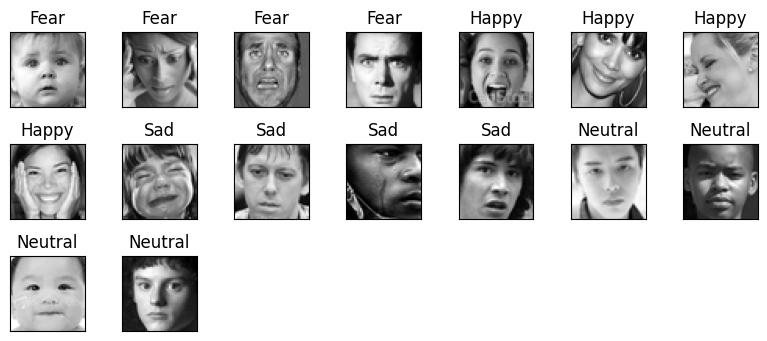

In [ ]:
fig = pyplot.figure(1, (8,8))

idx = 0
for k in label_to_text:
    sample_indices = np.random.choice(np.where(y_train==k)[0], size=4, replace=False)
    sample_images = X_train[sample_indices]
    for img in sample_images:
        idx += 1
        ax = pyplot.subplot(7,7,idx)
        ax.imshow(img[:,:,0], cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_to_text[k])
        pyplot.tight_layout()

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_train.shape

(21107, 4)

In [ ]:
y_test = tf.keras.utils.to_categorical(y_test)
y_test.shape

(2627, 4)

In [ ]:
y_valid = tf.keras.utils.to_categorical(y_valid)
y_valid.shape

(2651, 4)

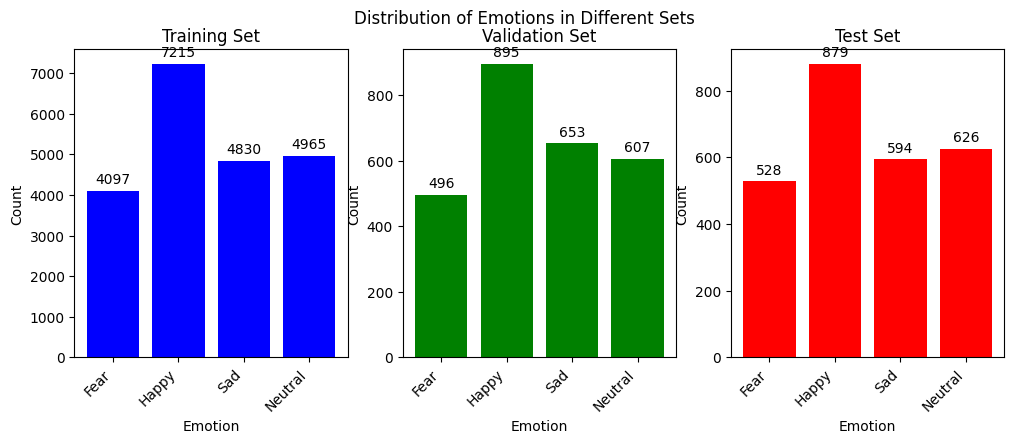

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the class labels
class_labels =label_to_text


# Define the colors to use for each set
set_colors = ['blue', 'green', 'red']

# Define the sets of labels to plot
label_sets = [y_train, y_valid, y_test]
set_names = ['Training Set', 'Validation Set', 'Test Set']

# Get the counts for each set and class
counts = [np.sum(labels, axis=0) for labels in label_sets]

# Create the subplot
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Loop over the sets and plot the histograms
for i, ax in enumerate(axs.flat):
    # Create the histogram plot
    bars = ax.bar(class_labels.values(), counts[i], color=set_colors[i])

    # Set the x-axis tick labels to be tilted by 45 degrees
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    # Add the count number on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.0f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.set_xlabel('Emotion')
    ax.set_ylabel('Count')
    ax.set_title(set_names[i])

# Set the overall title of the plot
fig.suptitle('Distribution of Emotions in Different Sets')

# # Set the background color of the subplots to white
# plt.rcParams['axes.facecolor'] = 'white'

# # Adjust the spacing between the subplots
# plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()


In [ ]:
X_train = X_train / 255.
X_valid=X_valid / 255.
X_test = X_test/ 255.

In [ ]:
import sklearn
X_train, y_train = sklearn.utils.shuffle(X_train, y_train)
X_valid , y_valid = sklearn.utils.shuffle(X_valid, y_valid)

splitting data into train and validation set 

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(img_arr, img_label,
#                                                     shuffle=True, stratify=img_label,
#                                                     train_size=0.9, random_state=42)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_depth = X_train.shape[3]
num_classes = y_train.shape[1]

In [ ]:
mobile_net = MobileNet(
    input_shape = (img_width, img_height, img_depth),
    include_top = False,
    weights = "imagenet",
    classes = num_classes
)

x = mobile_net.layers[-14].output
global_pool = GlobalMaxPool2D(name="global_pool")(x)
out = Dense(num_classes, activation="softmax", name="out_layer")(global_pool)

model = Model(inputs=mobile_net.input, outputs=out)

Instructions for updating:
Colocations handled automatically by placer.


17225924/17225924 [==============================] - 0s 0us/step


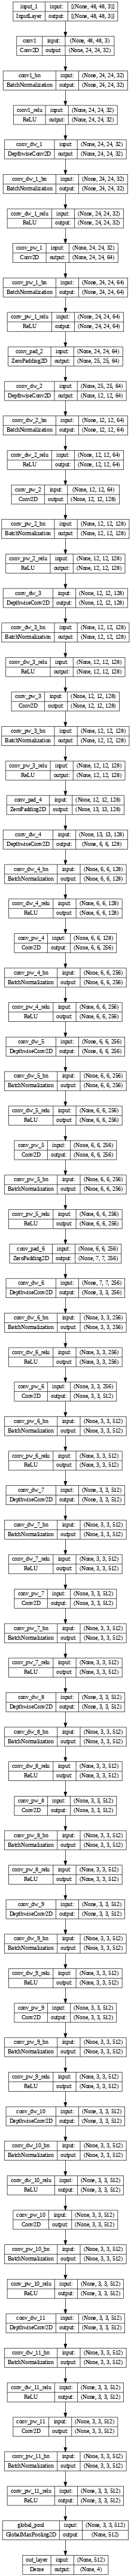

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True, expand_nested=True, dpi=50, to_file='mobilenet.png')

In [ ]:
for layer in model.layers[:15]:
    layer.trainable = False

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    zca_whitening=False,
)
train_datagen.fit(X_train)

In [ ]:
"""
I used two callbacks one is `early stopping` for avoiding overfitting training data
and other `ReduceLROnPlateau` for learning rate.
"""
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00008,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    min_delta=0.0001,
    factor=0.25,
    patience=4,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [ ]:
batch_size = 32
epochs = 100

optims = [
    optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    optimizers.legacy.Adam(0.01),
]

model.compile(
        loss='categorical_crossentropy',
        optimizer=optims[1],
        metrics=['accuracy']
)

history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_valid, y_valid),
    steps_per_epoch=len(X_train) / batch_size,
    epochs=epochs,
    callbacks=callbacks,
    use_multiprocessing=True
)

Epoch 1/100
660/659 [==============================] - ETA: 0s - batch: 329.5000 - size: 31.9803 - loss: 1.2863 - accuracy: 0.4861

/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


659/659 [==============================] - 249s 370ms/step - batch: 329.5000 - size: 31.9803 - loss: 1.2863 - accuracy: 0.4861 - val_loss: 1.0388 - val_accuracy: 0.5549 - lr: 0.0100
Epoch 2/100
659/659 [==============================] - 221s 335ms/step - batch: 329.5000 - size: 31.9803 - loss: 1.0360 - accuracy: 0.5639 - val_loss: 1.2164 - val_accuracy: 0.5443 - lr: 0.0100
Epoch 3/100
659/659 [==============================] - 225s 341ms/step - batch: 329.5000 - size: 31.9803 - loss: 0.9698 - accuracy: 0.5965 - val_loss: 1.3261 - val_accuracy: 0.5319 - lr: 0.0100
Epoch 4/100
659/659 [==============================] - 223s 338ms/step - batch: 329.5000 - size: 31.9803 - loss: 0.9335 - accuracy: 0.6113 - val_loss: 0.9429 - val_accuracy: 0.5922 - lr: 0.0100
Epoch 5/100
659/659 [==============================] - 223s 338ms/step - batch: 329.5000 - size: 31.9803 - loss: 0.9188 - accuracy: 0.6184 - val_loss: 1.0832 - val_accuracy: 0.5368 - lr: 0.0100
Epoch 6/100
659/659 [=====================

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

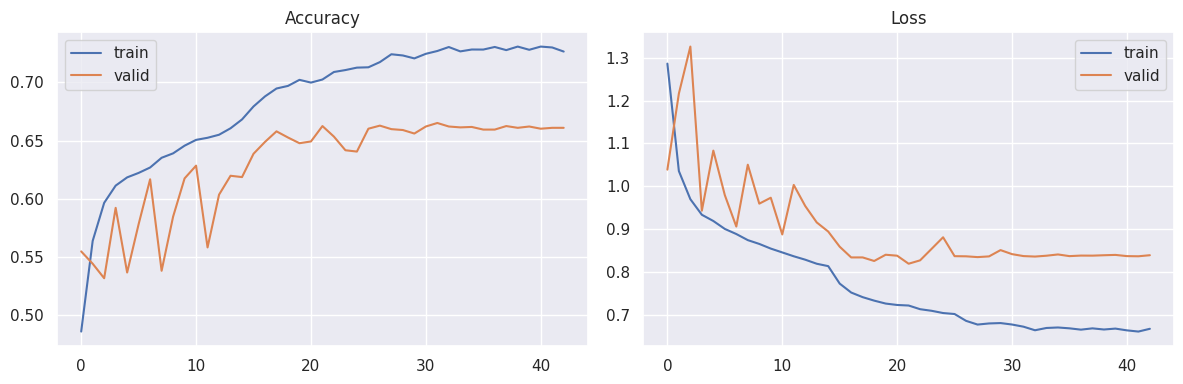

In [ ]:
sns.set()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].plot(history.epoch, history.history['accuracy'], label='train')
axes[0].plot(history.epoch, history.history['val_accuracy'], label='valid')
axes[0].set_title('Accuracy')
axes[0].legend()
axes[1].plot(history.epoch, history.history['loss'], label='train')
axes[1].plot(history.epoch, history.history['val_loss'], label='valid')
axes[1].set_title('Loss')
axes[1].legend()

plt.tight_layout()
plt.savefig('epoch_history_dcnn.png')
plt.show()


In [ ]:
!pip install scikit-plot
import scikitplot as skplt
from sklearn.metrics import classification_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


total wrong test predictions: 859


              precision    recall  f1-score   support

           0       0.63      0.52      0.57       528
           1       0.79      0.92      0.85       879
           2       0.53      0.58      0.55       594
           3       0.65      0.54      0.59       626

    accuracy                           0.67      2627
   macro avg       0.65      0.64      0.64      2627
weighted avg       0.67      0.67      0.67      2627



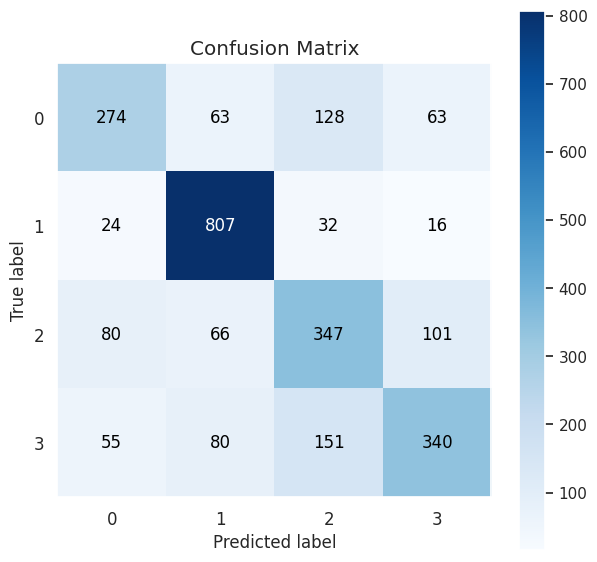

In [ ]:
predict_x = model.predict(X_test)
classes_x = np.argmax(predict_x,axis= 1)
skplt.metrics.plot_confusion_matrix(np.argmax(y_test, axis=1), classes_x,figsize=(7,7))
pyplot.savefig("confusion_matrix_dcnn.png")

print(f'total wrong test predictions: {np.sum(np.argmax(y_test, axis=1) != classes_x)}\n\n')
print(classification_report(np.argmax(y_test, axis=1), classes_x))

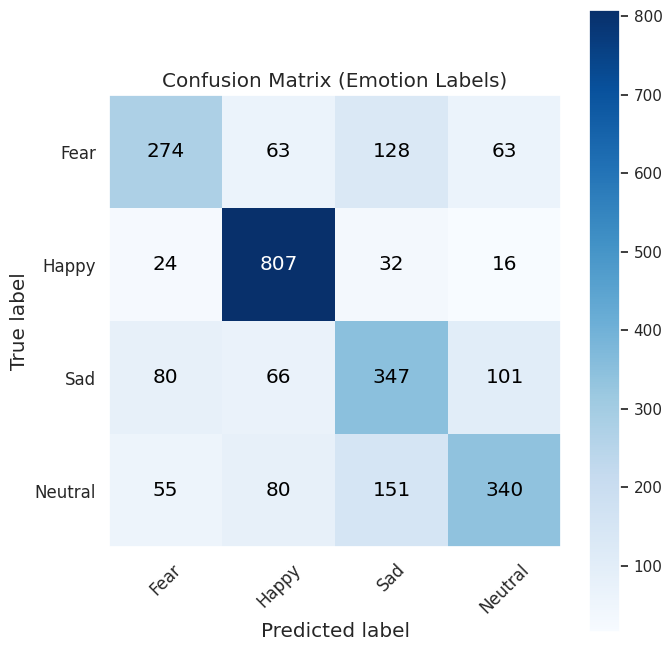

In [ ]:
import scikitplot as skplt
import numpy as np
import matplotlib.pyplot as plt

# Define emotion labels
emotion_labels = label_to_text


# Make predictions
predict_x = model.predict(X_test)
classes_x = np.argmax(predict_x, axis=1)

# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(np.argmax(y_test, axis=1), classes_x, figsize=(7, 7),
                                    title="Confusion Matrix (Emotion Labels)", 
                                    text_fontsize='large', cmap='Blues')

# Replace x and y tick labels with emotion names
tick_marks = np.arange(len(emotion_labels))
plt.xticks(tick_marks, list(emotion_labels.values()), rotation=45, fontsize=12)
plt.yticks(tick_marks, list(emotion_labels.values()), fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, classes_x)

correct_pred_per_class = np.diag(cm)
incorrect_pred_per_class = np.sum(cm, axis=1) - np.diag(cm)

print("Correct predictions per class:", correct_pred_per_class)
print("Incorrect predictions per class:", incorrect_pred_per_class)


Correct predictions per class: [274 807 347 340]
Incorrect predictions per class: [254  72 247 286]


In [ ]:
np.array(correct_pred_per_class) + np.array(incorrect_pred_per_class)

array([528, 879, 594, 626])

In [ ]:
np.sum(correct_pred_per_class) + np.sum(incorrect_pred_per_class)

2627

In [ ]:
np.sum(correct_pred_per_class)

1768

In [ ]:
mapper = label_to_text

np.random.seed(2)


random_dis_imgs = np.random.choice(np.where(y_valid[:, 1]==1)[0], size=9)
random_fear_imgs = np.random.choice(np.where(y_valid[:, 3]==1)[0], size=9)




fig = pyplot.figure(1, (18, 4))

for i, ( disidx, fearidx ) in enumerate(zip(random_dis_imgs, random_fear_imgs)):
        ax = pyplot.subplot(2, 9, i+1)
        sample_img = X_valid[disidx,:,:,0]
        ax.imshow(sample_img, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"true:dis, pr:{mapper[np.argmax(model.predict(sample_img.reshape(1,48,48,1))[0])]}")

       

        ax = pyplot.subplot(2, 9, i+10)
        sample_img = X_valid[fearidx,:,:,0]
        ax.imshow(sample_img, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"true:fear, pr:{mapper[np.argmax(model.predict(sample_img.reshape(1,48,48,1))[0])]}")



        pyplot.tight_layout()





In [ ]:
model.save('mobile.h5')